## Collecting Data 
Source of datasets :

1.   From IEEE : https://ieee-dataport.org/open-access/fruitsgb-top-indian-fruits-quality
2.   From Kaggle : https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification

But, we already combine both and make a drive. Below is the link for zip dataset (google drive): 
https://drive.google.com/file/d/1s0mHiO3wF_shUHO8NwjytBD1svWAFSr_/view?usp=sharing






In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
from google.colab import drive

#to connect drive account to colab
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import shutil
import os

source = r'/content/gdrive/MyDrive/dataset.zip'
destination = r'/content/dataset.zip'

In [5]:
shutil.copyfile(source, destination)

'/content/dataset.zip'

In [6]:
#extract zip file
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Explore Dataset and Preprocess






In [7]:
path = r'/content/dataset/'
categories = os.listdir(path)
categories

['Banana_Good',
 'Banana_Bad',
 'Orange_Bad',
 'Orange_Good',
 'Apple_Good',
 'Apple_Bad']

In [8]:
def count_num_file(path,name_dir):
  num_file = len(os.listdir(path+name_dir))
  return num_file
  
for categorie in categories :
  print("{} folder : {} file ".format(categorie, count_num_file(path,categorie)))
  

Banana_Good folder : 2963 file 
Banana_Bad folder : 3756 file 
Orange_Bad folder : 3009 file 
Orange_Good folder : 2869 file 
Apple_Good folder : 3088 file 
Apple_Bad folder : 3954 file 


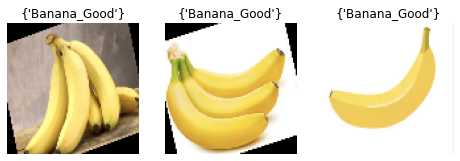

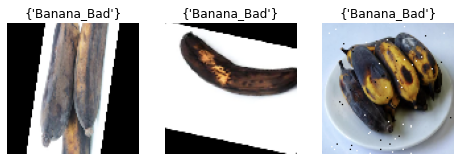

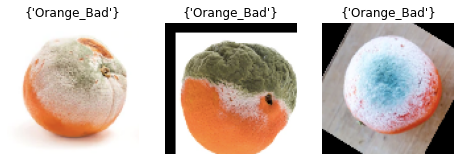

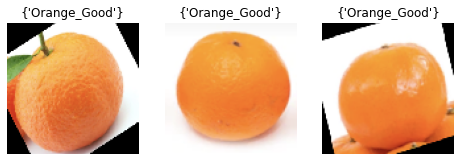

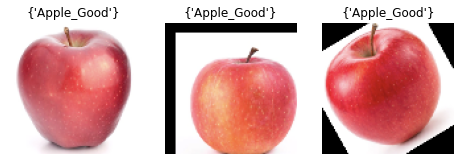

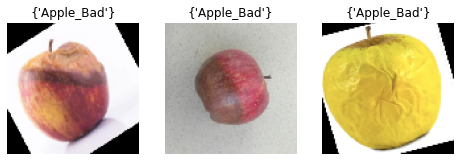

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline


def plot_img(name):
  img = [fn for fn in os.listdir(f'{path}/{name}')]
  
  select_img= np.random.choice(img, 3, replace = False)

  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      if i < 3:
        fp = f'{path}/{name}/{select_img[i]}'
        label = {name}
      
      ax = fig.add_subplot(1,3,i+1)
      
      fn = image.load_img(fp, target_size = (100,100))
      plt.imshow(fn)
      plt.title(label)
      plt.axis('off')
  plt.show()

for categorie in categories:
  plot_img(categorie)

In [10]:
def count_ext(path,categorie):
  count_img = 0
  
  for i in os.listdir(path+categorie):
    ext = os.path.splitext(os.path.basename(f'{path}{categorie}/{i}'))[1]
    if ext == '.jpg':
      count_img +=1
    
  print("{} have {} image with jpg extension".format(categorie,count_img))

for categorie in categories:
  count_ext(path,categorie)

Banana_Good have 1000 image with jpg extension
Banana_Bad have 1000 image with jpg extension
Orange_Bad have 1010 image with jpg extension
Orange_Good have 1006 image with jpg extension
Apple_Good have 1000 image with jpg extension
Apple_Bad have 1003 image with jpg extension


In [11]:
path_train = '/content/dataset_result/train/'
path_val = '/content/dataset_result/val/'

for categorie in categories:
  try:
    os.makedirs(path_train+categorie,exist_ok=True)
    print("Directory {} created successfully".format(path_train+categorie))
  except OSError as error:
    print("Directory {} can not be created".format(path_train+categorie))

for categorie in categories:
  try:
    os.makedirs(path_val+categorie,exist_ok=True)
    print("Directory {} created successfully".format(path_val+categorie))
  except OSError as error:
    print("Directory {} can not be created".format(path_val+categorie))

Directory /content/dataset_result/train/Banana_Good created successfully
Directory /content/dataset_result/train/Banana_Bad created successfully
Directory /content/dataset_result/train/Orange_Bad created successfully
Directory /content/dataset_result/train/Orange_Good created successfully
Directory /content/dataset_result/train/Apple_Good created successfully
Directory /content/dataset_result/train/Apple_Bad created successfully
Directory /content/dataset_result/val/Banana_Good created successfully
Directory /content/dataset_result/val/Banana_Bad created successfully
Directory /content/dataset_result/val/Orange_Bad created successfully
Directory /content/dataset_result/val/Orange_Good created successfully
Directory /content/dataset_result/val/Apple_Good created successfully
Directory /content/dataset_result/val/Apple_Bad created successfully


Convert the jpg image to png. Splitting train and val dataset manually, because we want to make sure that data from kaggle (web scrapping) is on training.  


*   Moving all data from kaggle to training 
*   Divide and convert to png data from IEEE

So, training : 80% (all kaggle data with some IEEE data) and validation : 20% (data from IEEE)



In [12]:
def split_file(path, name_dir):
  src_files= os.listdir(path+name_dir)
  #print(src_files)
  val_size = 0.2*count_num_file(path, name_dir)
  count_val_file = 0

  for file_name in src_files:
      split_ext = os.path.splitext(os.path.basename(f'{file_name}'))

      if split_ext[1] == '.png':
        src = os.path.join(path+name_dir, file_name)
        
        dest = os.path.join(path_train+name_dir, file_name)
     
        shutil.copy(src, dest)

      elif split_ext[1] == '.jpg':
        if count_val_file > val_size :
          src = os.path.join(path+name_dir, file_name)
     
          dest = os.path.join(path_train+name_dir, split_ext[0]+'.png')

          shutil.copy(src, dest)
          #print('succes copy from {} to {}'.format(src,dest))
        else :
          src = os.path.join(path+name_dir, file_name)
          dest = os.path.join(path_val+name_dir, split_ext[0]+'.png')
          shutil.copy(src,dest)
          count_val_file = count_val_file + 1
         # print('succes copy from {} to {}'.format(src,dest))

In [13]:
for categorie in categories:
  split_file(path, categorie)

In [14]:
#count number of file in val directory
for categorie in categories:
  print("{} validation folder have : {} files".format(categorie,count_num_file(path_val,categorie)))
    

Banana_Good validation folder have : 593 files
Banana_Bad validation folder have : 752 files
Orange_Bad validation folder have : 602 files
Orange_Good validation folder have : 574 files
Apple_Good validation folder have : 618 files
Apple_Bad validation folder have : 791 files


In [15]:
#count number of file in train directory
for categorie in categories:
  print("{} training folder have : {} files".format(categorie,count_num_file(path_train,categorie)))
    

Banana_Good training folder have : 2369 files
Banana_Bad training folder have : 3004 files
Orange_Bad training folder have : 2406 files
Orange_Good training folder have : 2294 files
Apple_Good training folder have : 2470 files
Apple_Bad training folder have : 3162 files


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Add generator and do augmentation to dataset
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest')
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest')

In [17]:
train_generator = train_datagen.flow_from_directory(
        path_train,  
        target_size=(100, 100),
        batch_size=32,
        shuffle=True, 
        class_mode='categorical')
val_generator = train_datagen.flow_from_directory(
        path_val,  
        target_size=(100, 100),
        batch_size=32,
        shuffle=True, 
        class_mode='categorical')

Found 15705 images belonging to 6 classes.
Found 3930 images belonging to 6 classes.


**Make model using CNN**


In [ ]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
   
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 67712)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)              

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
history=model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=100,
      validation_data=val_generator, 
      validation_steps=5, 
      verbose=1)

Epoch 1/100
25/25 [==============================] - 6s 230ms/step - loss: 2.1108 - accuracy: 0.2562 - val_loss: 1.7838 - val_accuracy: 0.1813
Epoch 2/100
25/25 [==============================] - 5s 217ms/step - loss: 1.6981 - accuracy: 0.2625 - val_loss: 1.7209 - val_accuracy: 0.2688
Epoch 3/100
25/25 [==============================] - 5s 220ms/step - loss: 1.5464 - accuracy: 0.3950 - val_loss: 1.6762 - val_accuracy: 0.3187
Epoch 4/100
25/25 [==============================] - 5s 220ms/step - loss: 1.4342 - accuracy: 0.4212 - val_loss: 1.7070 - val_accuracy: 0.2313
Epoch 5/100
25/25 [==============================] - 5s 215ms/step - loss: 1.4237 - accuracy: 0.4338 - val_loss: 1.6639 - val_accuracy: 0.3812
Epoch 6/100
25/25 [==============================] - 5s 219ms/step - loss: 1.3764 - accuracy: 0.4262 - val_loss: 1.7226 - val_accuracy: 0.3375
Epoch 7/100
25/25 [==============================] - 5s 220ms/step - loss: 1.2798 - accuracy: 0.4988 - val_loss: 1.6735 - val_accuracy: 0.2625

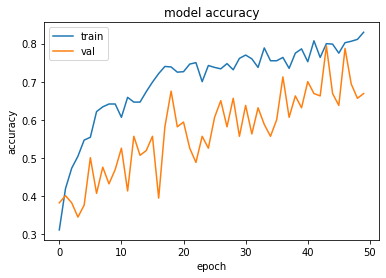

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

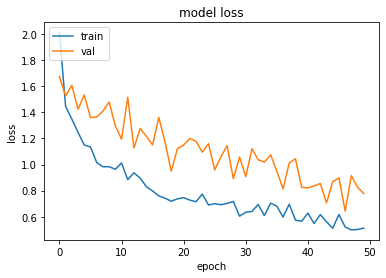

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

****
## Exploring to reduce overfitting


1. Try to add regularizers

In [18]:
import tensorflow as tf
from keras import regularizers

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),

    #add regularizer on layer below
    tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.00001)),
    tf.keras.layers.Dropout(0.5),
   
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [19]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

2. Trying to add more steps per epoch and validation steps

In [20]:
history=model.fit(
      train_generator,
      steps_per_epoch=400, 
      epochs=20,
      validation_data=val_generator, 
      validation_steps=120, 
      verbose=1)

Epoch 1/20
400/400 [==============================] - 130s 251ms/step - loss: 0.9753 - accuracy: 0.6392 - val_loss: 0.9922 - val_accuracy: 0.6299
Epoch 2/20
400/400 [==============================] - 99s 248ms/step - loss: 0.6533 - accuracy: 0.7617 - val_loss: 0.8127 - val_accuracy: 0.7242
Epoch 3/20
400/400 [==============================] - 98s 245ms/step - loss: 0.5476 - accuracy: 0.8103 - val_loss: 0.6829 - val_accuracy: 0.7276
Epoch 4/20
400/400 [==============================] - 98s 244ms/step - loss: 0.5070 - accuracy: 0.8244 - val_loss: 0.6626 - val_accuracy: 0.7635
Epoch 5/20
400/400 [==============================] - 98s 244ms/step - loss: 0.4779 - accuracy: 0.8352 - val_loss: 0.7548 - val_accuracy: 0.7221
Epoch 6/20
400/400 [==============================] - 98s 245ms/step - loss: 0.4572 - accuracy: 0.8459 - val_loss: 0.5329 - val_accuracy: 0.8357
Epoch 7/20
400/400 [==============================] - 99s 247ms/step - loss: 0.4186 - accuracy: 0.8595 - val_loss: 0.4920 - val_a

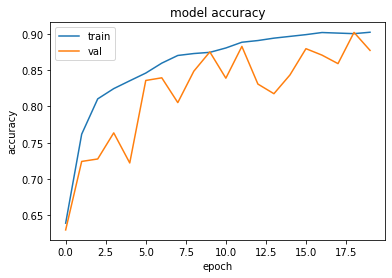

In [21]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

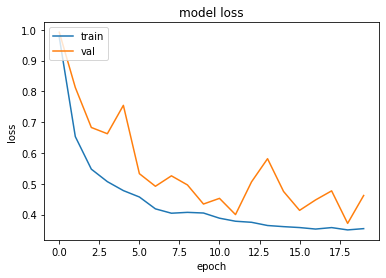

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

123/123 [==============================] - 16s 133ms/step - loss: 0.4535 - accuracy: 0.8761
Accuracy train:  0.9137217402458191
Accuracy test:  0.8760814070701599
